##  Résolution par différence finies de l'équation de Poisson sur un domaine 2D rectangulaire

Position du Problème. On veut résoudre le problème suivant : 

(1)  $ - \lambda \Delta u = f $, pour $(x,y) \in \Omega = ]0,L[ \times ]0,H[$

(2)  $ u = g_d $,    pour $(x,y) \in [0,L] \times \{ 0 \}$

(3)  $ u = g_u $,    pour $(x,y) \in [0,L] \times \{ H \}$

(4)  $ u = g_l $,    pour $(x,y) \in  \{ 0 \} \times [0,H]$

(5)  $ u = g_r $,    pour $(x,y) \in \{ L \}  \times [0,H]$

où $g_d, g_u, g_l, g_r$ sont des constantes et $f$ est une fonction régulière donnée. 

L'objectif du TP est :
- de comprendre comment on programme les étapes d'assemblage de la matrice et du second membre pour une méthode de Différences finies
- d'étudier comment évolue la solution discrète lorsqu'on fait varier le pas de maillage, les conditions aux limites et le second membre f.

In [1]:
import numpy as np
import numpy.linalg as npla
import scipy as sp
import scipy.sparse as spsp
import scipy.sparse.linalg
import matplotlib as mpl
import matplotlib.pyplot as plt
from math import * 

In [10]:
# Définition de la fonction f 
def funcf(x,y,L,H):
    xc = 0.5 * L 
    yc = 0.5 * H
    delta_x = 0.15 * L 
    delta_y = 0.15 * H
    fmax = 50.0     
    f = fmax * exp(-((x-xc)/delta_x)**2 - ((y-yc)/delta_y)**2)
    return f

In [3]:
def indk(i,j,I) :
    k = i + j*I
    return k 

In [4]:
def Matrice(I,J,dx,dy,lamda):
    K = I*J
    # On déclare une matrice creuse de dimension K x K
    A = spsp.csr_matrix((K, K))
    # On boucle sur les noeuds internes uniquement pour mettre à jour les coefficients A(k,k')
    for i in range(1,I-1):
        for j in  range(1,J-1):
            k = indk(i,j,I)
            ke = indk(i+1,j,I)
            ko = indk(i-1,j,I)
            kn = indk(i,j+1,I)
            ks = indk(i,j-1,I)
            A[k,k] = A compléter 
            A[k,ke] =  A compléter
            A[k,ko] =  A compléter
            A[k,kn] =  A compléter
            A[k,ks] =   A compléter
    # On met à 1 les coefficients diagonaux de A associés aux noeuds frontière pour gérer la CL de Dirichlet 
    # Boucle sur les noeuds de la frontière x=0 
    for j in  range(J):
        k = indk(0,j,I)
        A[k,k] = 1.0
    # Boucle sur les noeuds de la frontière x=L  
    for j in  range(J):
        k = indk(I-1,j,I)
        A[k,k] = 1.0
    # Boucle sur les noeuds de la frontière y=0 
    for i in  range(I):
        k = indk(i,0,I)
        A[k,k] = 1.0
    # Boucle sur les noeuds de la frontière y=H 
    for i in  range(I):
        k = indk(i,J-1,I)
        A[k,k] = 1.0
    return A

In [5]:
def Second_membre(I,J,dx,dy,L,H,gl,gr,gb,gt):
    K = I*J
    # Initialisation du second membre S 
    S =  np.zeros((K,1))
    # Boucle sur les noeuds internes pour la contribution de la source f à S 
    for i in range(1,I-1):
        for j in  range(1,J-1):
            k = indk(i,j,I)
            S[k] =  A compléter
    # Boucle sur les noeuds de la frontière x=0 pour la contribution de gl à S
    for j in  range(J):
        k = indk(0,j,I)
        S[k] =  A compléter
    # Boucle sur les noeuds de la frontière x=L pour la contribution de gr à S 
    for j in  range(J):
        k = indk(I-1,j,I)
        S[k] =  A compléter
    # Boucle sur les noeuds de la frontière y=0 pour la contribution de gb à S 
    for i in  range(I):
        k = indk(i,0,I)
        S[k] =  A compléter
    # Boucle sur les noeuds de la frontière y=H pour la contribution de gt à S 
    for i in  range(I):
        k = indk(i,J-1,I)
        S[(k)] =  A compléter
    return S 

In [6]:
## Fonctions utilisées pour l'affichage des résultats 

def convert_u1d2d(u,I,J):
    u2d = np.zeros((I,J))
    for i in range(I):
        for j in  range(J):
            k = indk(i,j,I)
            u2d[i,j] = u[k]
    return np.transpose(u2d)

def calculf2d(I,J,dx,dy,L,K):
    f2d = np.zeros((I,J))
    for i in range(I):
        for j in  range(J):
            f2d[i,j] = funcf(i*dx,j*dy,L,H)
    return np.transpose(f2d)

def flux_chaleur(u2d,lamda,I,J,dx,dy):
    # On doit prendre la transposée de u2d pour revenir à x = i et y = j
    u2d = np.transpose(u2d)
    Phi2dx = np.zeros((I,J))
    Phi2dy = np.zeros((I,J))
    # Boucle sur les noeuds internes 
    for i in range(1,I-1):
        for j in  range(1,J-1):
            Phi2dx[i,j] = - lamda * (u2d[i+1,j] - u2d[i-1,j])/(2.0 * dx)
            Phi2dy[i,j] = - lamda * (u2d[i,j+1] - u2d[i,j-1])/(2.0 * dy)
    # Boucle sur les noeuds de la frontière x=0 
    for j in  range(1,J-1):
        i = 0
        Phi2dx[i,j] = - lamda * (u2d[i+1,j] - u2d[i,j])/dx
        Phi2dy[i,j] = - lamda * (u2d[i,j+1] - u2d[i,j-1])/(2.0 * dy)
    # Boucle sur les noeuds de la frontière x=L 
    for j in  range(1,J-1):
        i = I-1
        Phi2dx[i,j] = - lamda * (u2d[i,j] - u2d[i-1,j])/dx
        Phi2dy[i,j] = - lamda * (u2d[i,j+1] - u2d[i,j-1])/(2.0 * dy)
    # Boucle sur les noeuds de la frontière y=0 
    for i in range(1,I-1):
        j = 0
        Phi2dx[i,j] = - lamda * (u2d[i+1,j] - u2d[i-1,j])/(2.0 * dx)
        Phi2dy[i,j] = - lamda * (u2d[i,j+1] - u2d[i,j])/dy
    # Boucle sur les noeuds de la frontière y=H  
    for i in range(1,I-1):
        j = J-1
        Phi2dx[i,j] = - lamda * (u2d[i+1,j] - u2d[i-1,j])/(2.0 * dx)
        Phi2dy[i,j] = - lamda * (u2d[i,j] - u2d[i,j-1])/dy
    # Cas des coins 
    Phi2dx[0,0] = - lamda * (u2d[1,0] - u2d[0,0])/dx
    Phi2dy[0,0] = - lamda * (u2d[0,1] - u2d[0,0])/dy  
    Phi2dx[0,J-1] = - lamda * (u2d[1,J-1] - u2d[0,J-1])/dx
    Phi2dy[0,J-1] = - lamda * (u2d[0,J-1] - u2d[0,J-2])/dy  
    Phi2dx[I-1,0] = - lamda * (u2d[I-1,0] - u2d[I-2,0])/dx
    Phi2dy[I-1,0] = - lamda * (u2d[I-1,1] - u2d[I-1,0])/dy  
    Phi2dx[I-1,J-1] = - lamda * (u2d[I-1,J-1] - u2d[I-2,J-1])/dx
    Phi2dy[I-1,J-1] = - lamda * (u2d[I-1,J-1] - u2d[I-1,J-2])/dy 
    return np.transpose(Phi2dx), np.transpose(Phi2dy)

Uitiliser le programme suivant pour étudier comment varie la solution lorsque vous faites varier le pas de maillage, les conditions aux limites et le second membre (en modififiant la fonction  funcf(x,y,L,H))

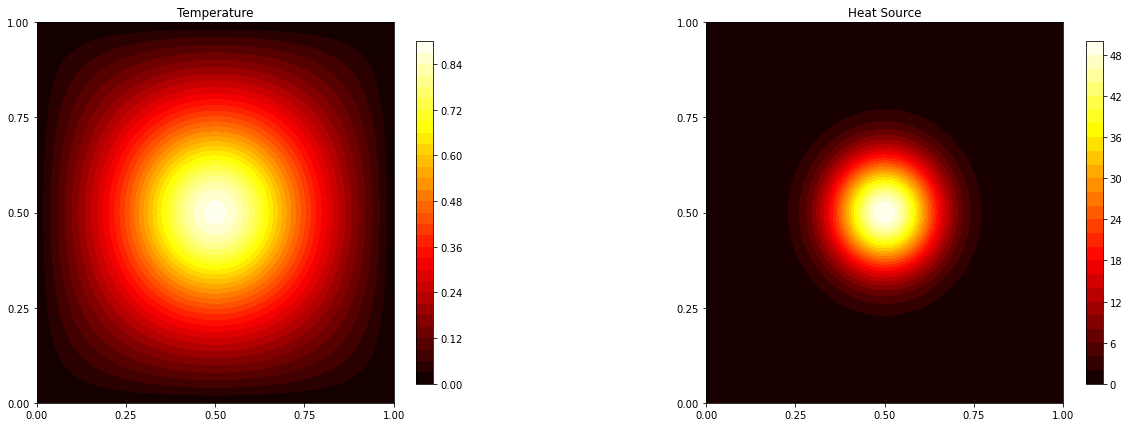

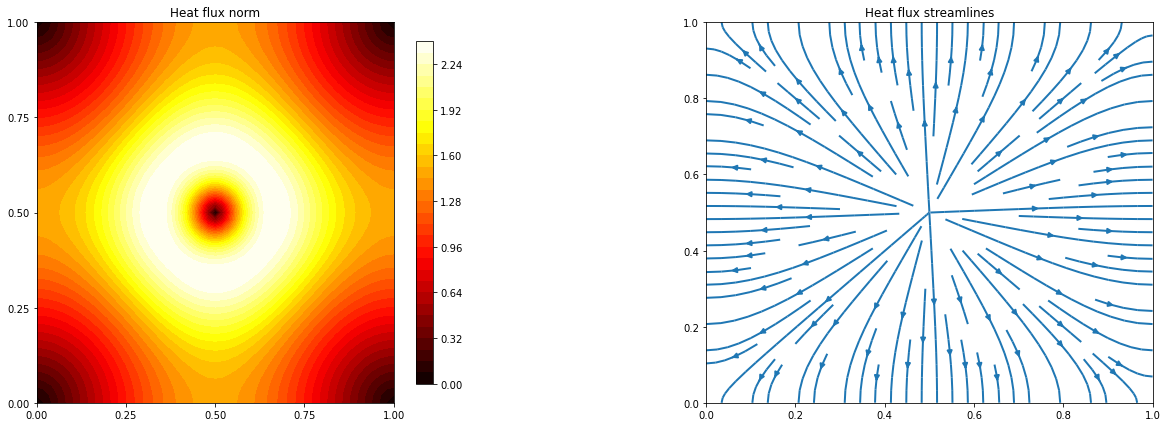

In [17]:
######################################  Programme principal #################################
# Resolution de - lamda Lap(u) = f sur Omega, u = g sur dOmega 

# Données géométriques 
L = 1.0 
H = 1.0 

# Données physique
lamda = 1.0    

# CL 
gl = 0.0
gr = 0.0
gb = 0.0
gt = 0.0

# Paramètres Numériques
I = 51                              # Nombre de noeuds selon x
J = 51                              # Nombre de noeuds selon y
dx = L/(I-1)                        # Pas de maillage en x 
dy = H/(J-1)                        # Pas de maillage en y
xn = np.linspace(0., L, I)          # Abscisses des noeuds 
yn = np.linspace(0., H, J)          # Ordonnées des noeuds  
X,Y = np.meshgrid(xn, yn)           # Coordonnées des noeuds de la grille DF 

# Assemblage de la matrice associée au problème 
A = Matrice(I,J,dx,dy,lamda)

# Assemblage du second membre associé au problème 
S = Second_membre(I,J,dx,dy,L,H,gl,gr,gb,gt)

# Calcul de la solution du problème 
u = spsp.linalg.spsolve(A, S, permc_spec=None, use_umfpack=True)

# Calculs auxillaires pour affichage de la solution   
u2d  = convert_u1d2d(u,I,J)                            # solution en fonction de i,j
Phi2dx, Phi2dy = flux_chaleur(u2d,lamda,I,J,dx,dy)   # flux de chaleur 
f2d  = calculf2d(I,J,dx,dy,L,H)                      # source de chaleur en fonction de i,j 

# Affichage 
fig, axs = plt.subplots(1, 2, figsize=(20, 7*H/L))
axs = axs.flat
Nblevels = 31

## Iso-contour tempéraure u
cs = axs[0].contourf(X, Y, u2d, Nblevels,cmap='hot' )
fig.colorbar(cs, ax=axs[0], shrink=0.9)
axs[0].set_title('Temperature')
axs[0].set_xticks(np.linspace(0,L,5,endpoint=True))
axs[0].set_yticks(np.linspace(0,H,5,endpoint=True))

## Iso-niveaux source de chaleur f (source volumique)
cs = axs[1].contourf(X, Y, f2d, Nblevels, cmap='hot')
fig.colorbar(cs, ax=axs[1], shrink=0.9)
axs[1].set_title('Heat Source')
axs[1].set_xticks(np.linspace(0,L,5,endpoint=True))
axs[1].set_yticks(np.linspace(0,H,5,endpoint=True))
        
for ax in axs:
    ax.label_outer()
    fig.subplots_adjust(wspace=0.5, hspace=0.4)
    plt.show()
    
fig, axs = plt.subplots(1, 2, figsize=(20, 7*H/L))
axs = axs.flat
Nblevels = 31

## Iso-niveaux norme du flux de chaleur
Phi2d = np.zeros((I,J))
Phi2d[:,:] = (Phi2dx[:,:]**2 + Phi2dy[:,:]**2)**0.5
cs = axs[0].contourf(X, Y, Phi2d, Nblevels, cmap='hot')
fig.colorbar(cs, ax=axs[0], shrink=0.9)
axs[0].set_title('Heat flux norm')
axs[0].set_xticks(np.linspace(0,L,5,endpoint=True))
axs[0].set_yticks(np.linspace(0,H,5,endpoint=True))

## Lignes de courant associées au flux de chaleur 
cs = axs[1].streamplot(X, Y, Phi2dx, Phi2dy, linewidth=2)
axs[1].set_title('Heat flux streamlines')

for ax in axs:
    ax.label_outer()
    fig.subplots_adjust(wspace=0.5, hspace=0.4)
    plt.show()
